In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle

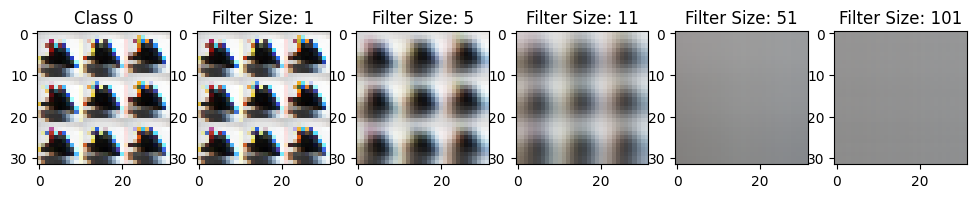

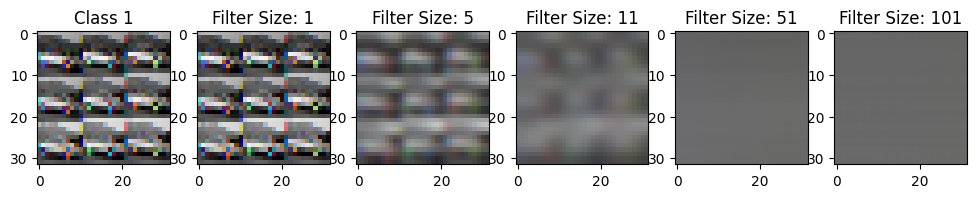

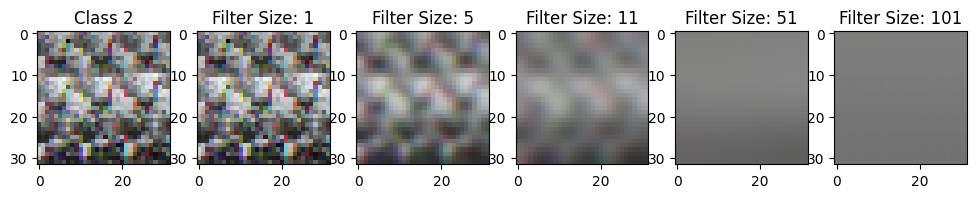

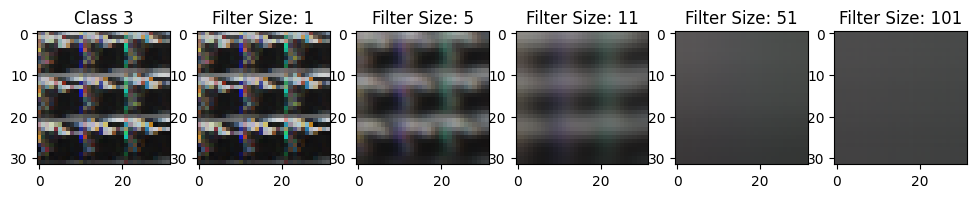

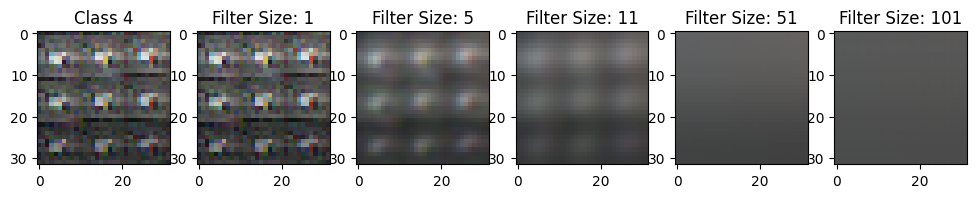

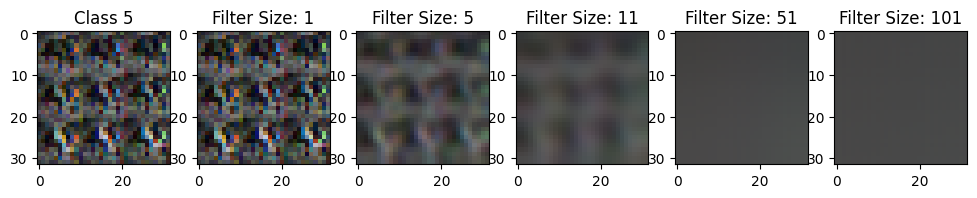

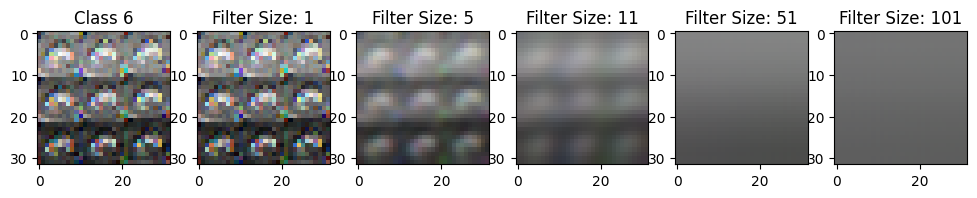

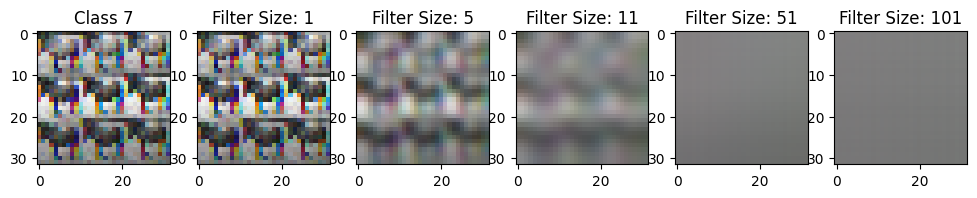

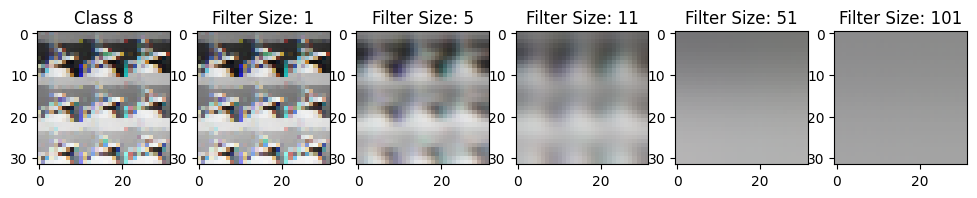

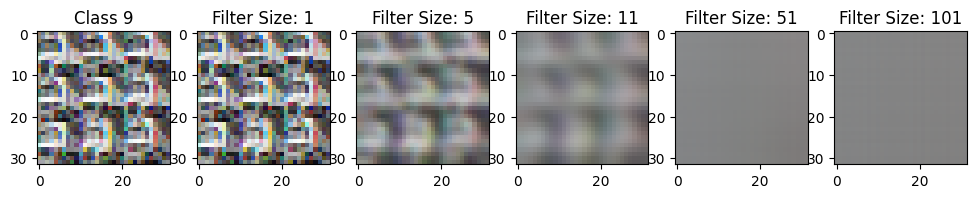

In [2]:
# Function to load CIFAR-10 data
def load_cifar10_data(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file, encoding='bytes')
    return data

# Function to apply Gaussian filtering and plot the images
def apply_gaussian_filter(images, labels, filter_sizes):
    # Iterating through each class
    for class_label in range(10):
        # Find the index of the first image belonging to the current class
        index = labels.index(class_label)

        # Loading the image and plotting the original ones
        image = images[index].reshape((32, 32, 3))
        plt.figure(figsize=(12, 3))
        plt.subplot(1, len(filter_sizes) + 1, 1)
        plt.imshow(image)
        plt.title(f'Class {class_label}')

        # Gaussian filter for different sizes
        for i, filter_size in enumerate(filter_sizes):
            # Ensure the filter size is odd
            if filter_size % 2 == 0:
                filter_size += 1

            filtered_image = cv2.GaussianBlur(image, (filter_size, filter_size), 0)

            # Plotting the filtered image
            plt.subplot(1, len(filter_sizes) + 1, i + 2)
            plt.imshow(filtered_image)
            plt.title(f'Filter Size: {filter_size}')

        plt.show()

# Loading the dataset
file_path = '/content/data_batch_1'  # Replace with the actual path
batch_data = load_cifar10_data(file_path)
data = batch_data[b'data']
labels = batch_data[b'labels']

# Selectinf 10 images (all from data_batch_1)
selected_images = []
selected_labels = []

for i in range(len(labels)):
    if labels[i] not in selected_labels:
        selected_labels.append(labels[i])
        selected_images.append(data[i])

# Converting the list to a numpy array (this will help in passing down all the images in an array together)
selected_images = np.array(selected_images)

# Defining the Gaussian filter sizes
filter_sizes = [1, 5, 10, 50, 100]

# Calling the function to apply gaussian filter and plot the original & filtered images
apply_gaussian_filter(selected_images, selected_labels, filter_sizes)

**By increasing the value of Sigma of the Gaussian filter I can observe that the images have become a little more blurred with increasing sigma value.** Since gaussian filter is used for removing noise and smoothening out the image, increasing the sigma value in the filter helps us in removing a lot more noise and giving us a very smooth image. However, I feel that we should be careful while choosing the sigma value as per the requirement because a higher sigma can result in an extra blurred image which we may not want.

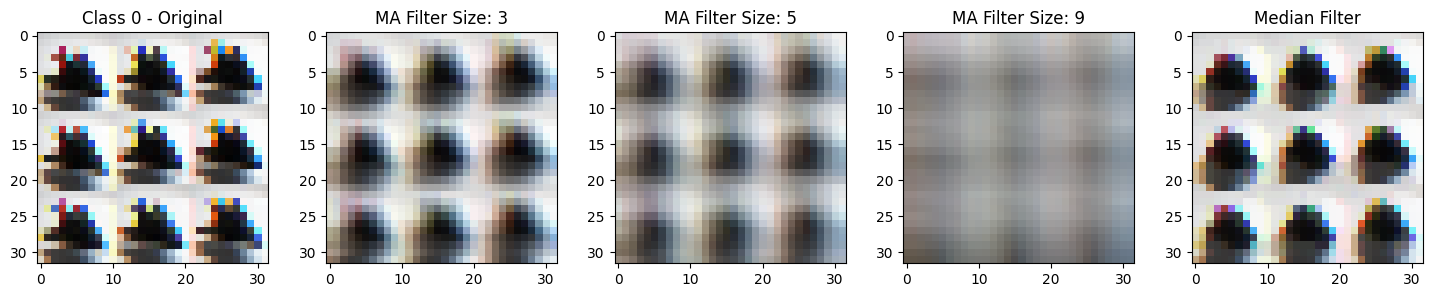

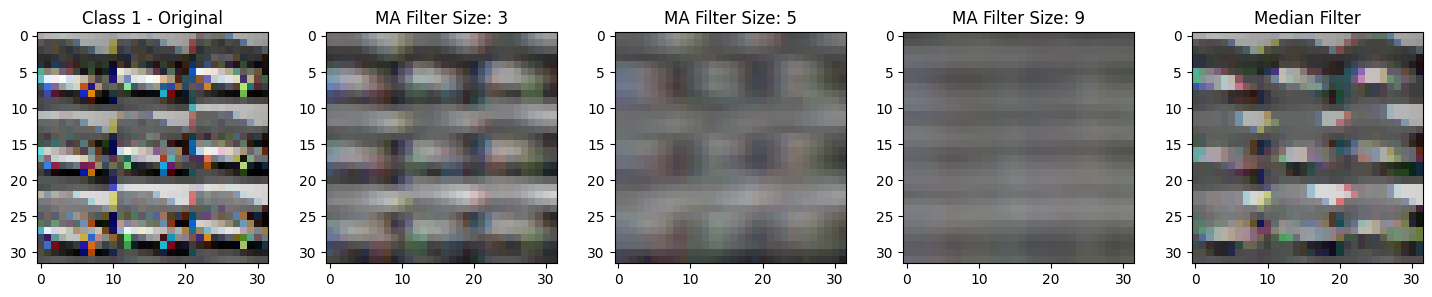

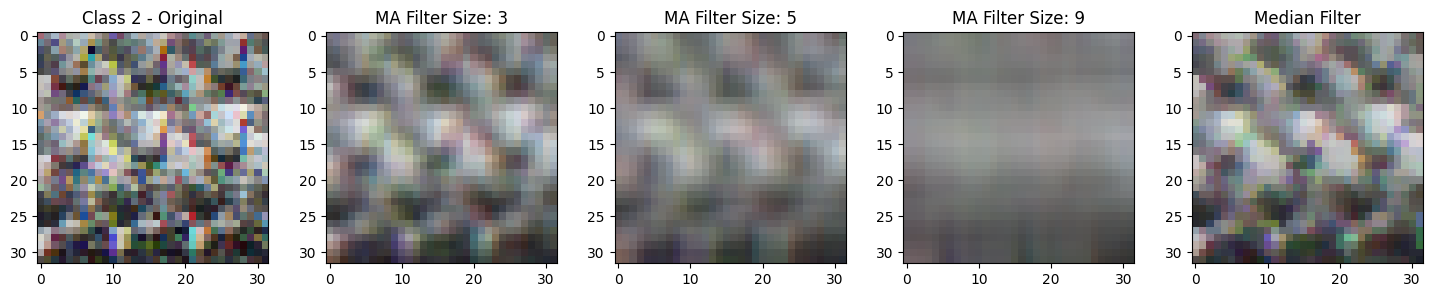

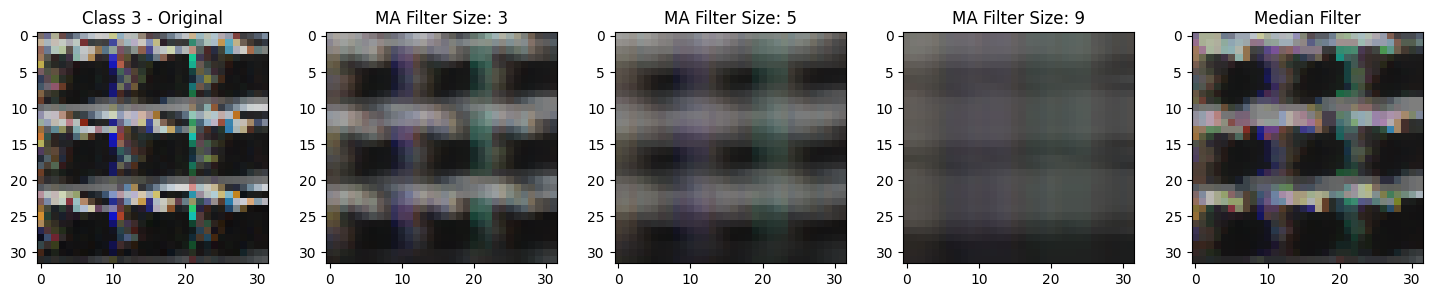

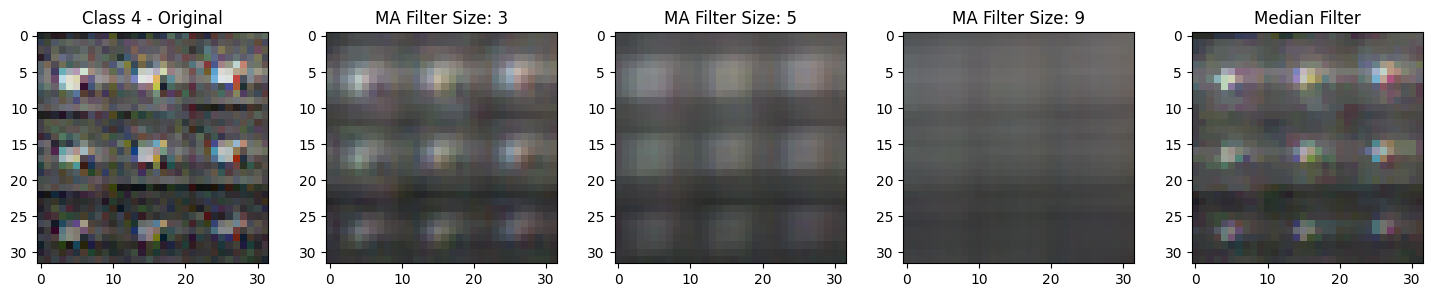

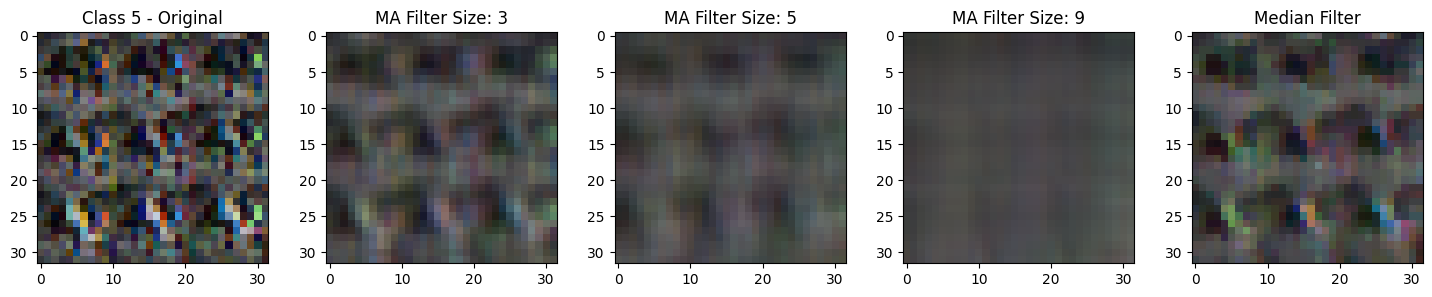

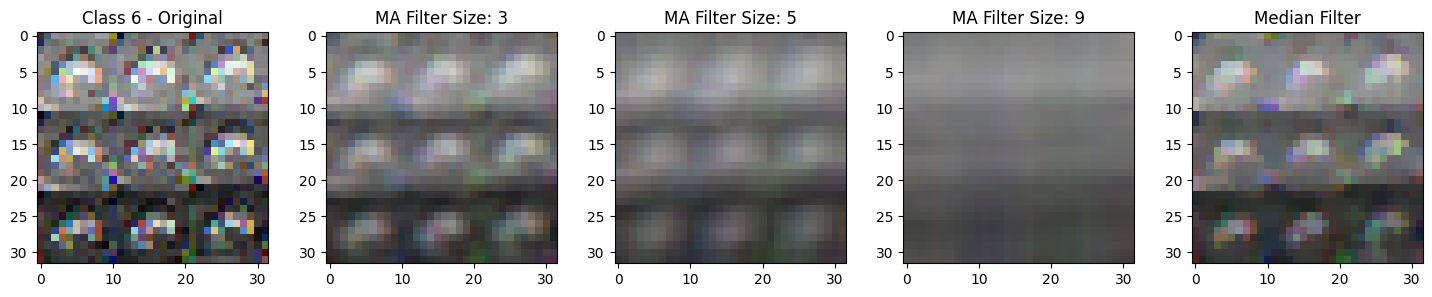

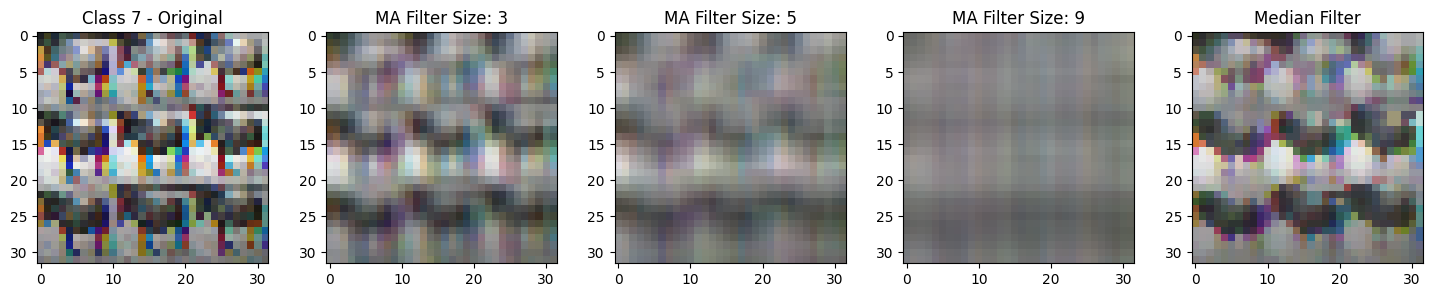

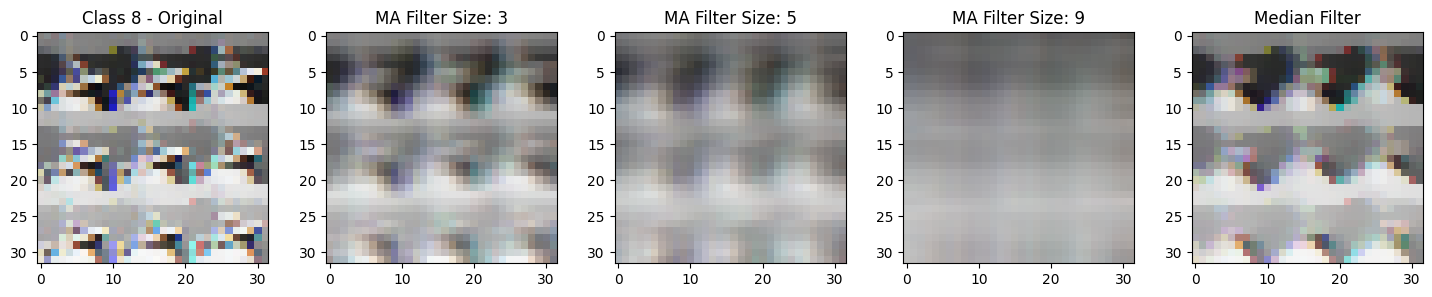

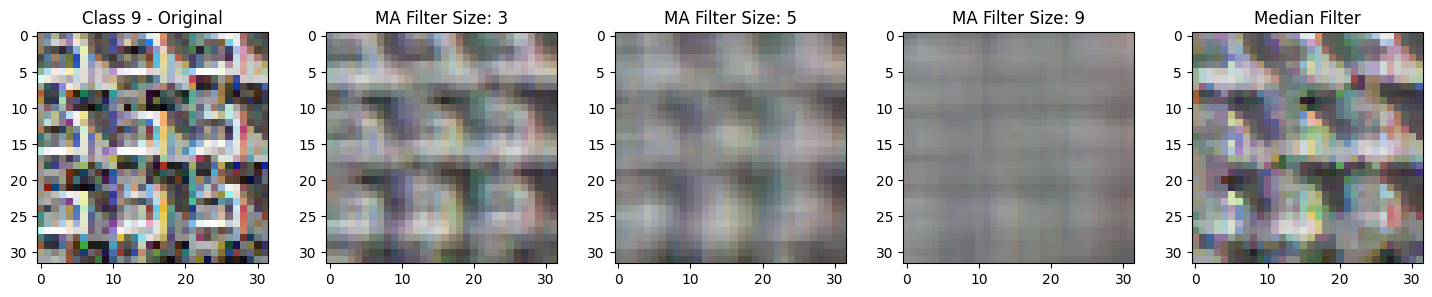

In [3]:
# Function to apply filters and plot the images
def apply_ma_and_median_filters(images, labels, filter_sizes):
    # Iterate through each class
    for class_label in range(10):
        # Find the index of the first image belonging to the current class
        index = labels.index(class_label)

        # Load the image
        image = images[index].reshape((32, 32, 3))

        # Plot the original image
        plt.figure(figsize=(18, 3))
        plt.subplot(1, len(filter_sizes) + 2, 1)
        plt.imshow(image)
        plt.title(f'Class {class_label} - Original')

        # Apply moving average filter for different sizes
        for i, filter_size in enumerate(filter_sizes):
            filtered_image_ma = cv2.blur(image, (filter_size, filter_size))

            # Plot the filtered image
            plt.subplot(1, len(filter_sizes) + 2, i + 2)
            plt.imshow(filtered_image_ma)
            plt.title(f'MA Filter Size: {filter_size}')

        # Apply median filter
        filtered_image_median = cv2.medianBlur(image, 3)  # Using a fixed kernel size of 3 for median filter

        # Plot the median filtered image
        plt.subplot(1, len(filter_sizes) + 2, len(filter_sizes) + 2)
        plt.imshow(filtered_image_median)
        plt.title('Median Filter')

        plt.show()

# Define random filter sizes for moving average to observe difference
filter_sizes_ma = [3, 5, 9]

# Calling the function to apply moving average & median filter and plot the original & filtered images
apply_ma_and_median_filters(selected_images, selected_labels, filter_sizes_ma)

**Observation:** Increased filter size in the Moving Average filter is creating a more blurred effect on the images because it is taking the average of a higher number of neighbors with increased size. It is averaging out more due to more number of pixels involved now. If a pixel's value might be slightly higher than its neighbors, contradicting our assumption that neighbors are similar, then it can result in a slightly higher or lower average than expected.
In case of the Median filter, it is not creating a pronounced blurred effect which is good. **It is able to preserve the edges while handling the noise in the images.**

I would prefer the median filter amongst all three because while gaussian filter has the advantage of changing filter sizes, it might not be able to handle noise effectively with a small filter size and with a larger size the image can get quite blurred. Moving average filter smoothens the image too much and removes excess noise in order to use the image. Median filter is able to retain the image information while also handling noise efficiently.

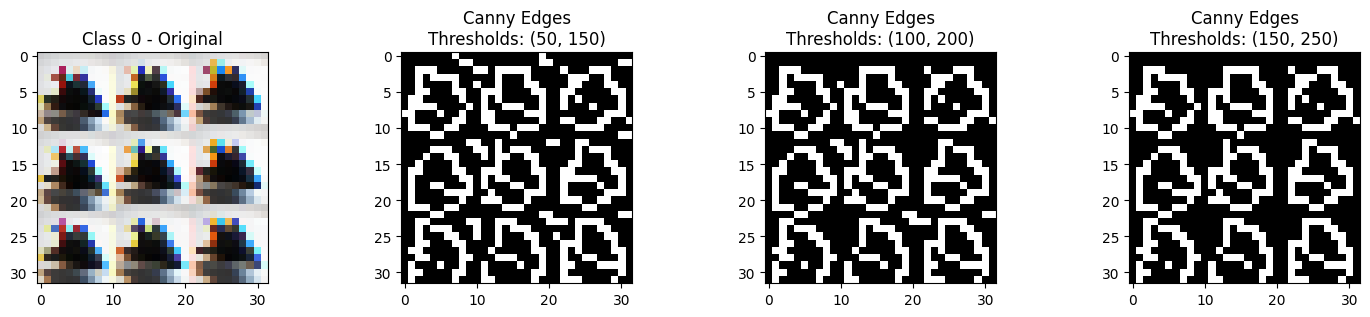

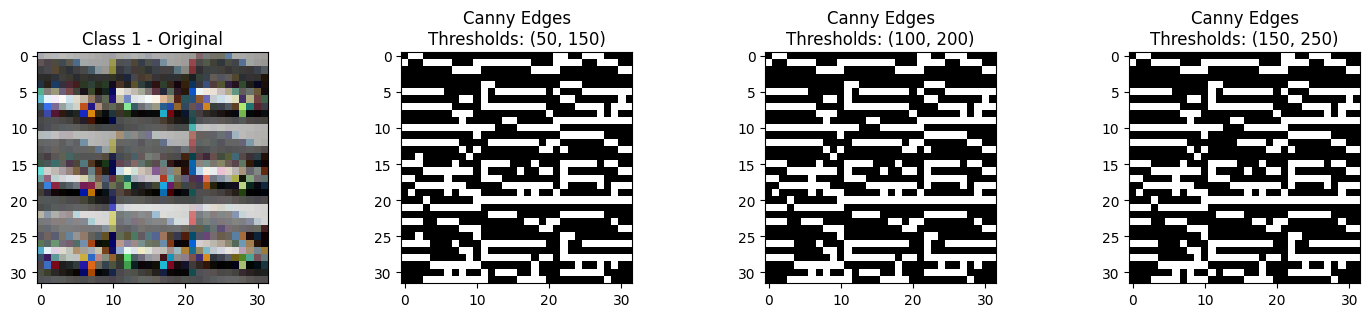

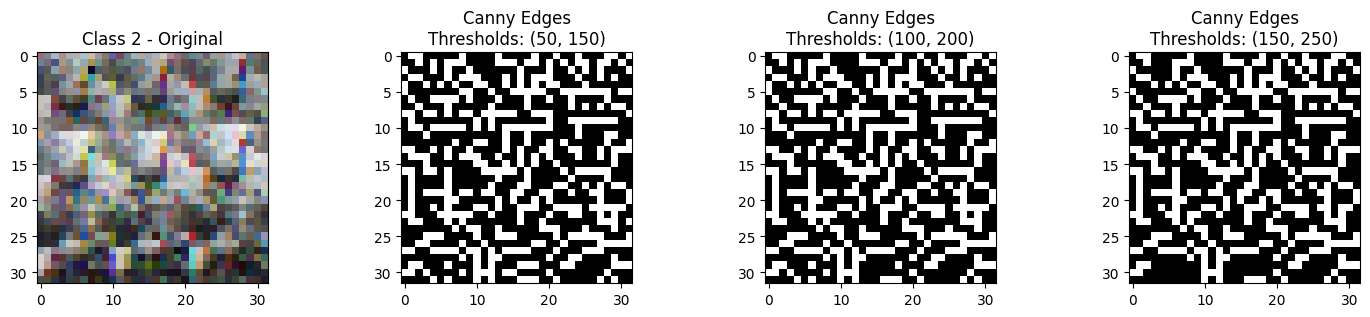

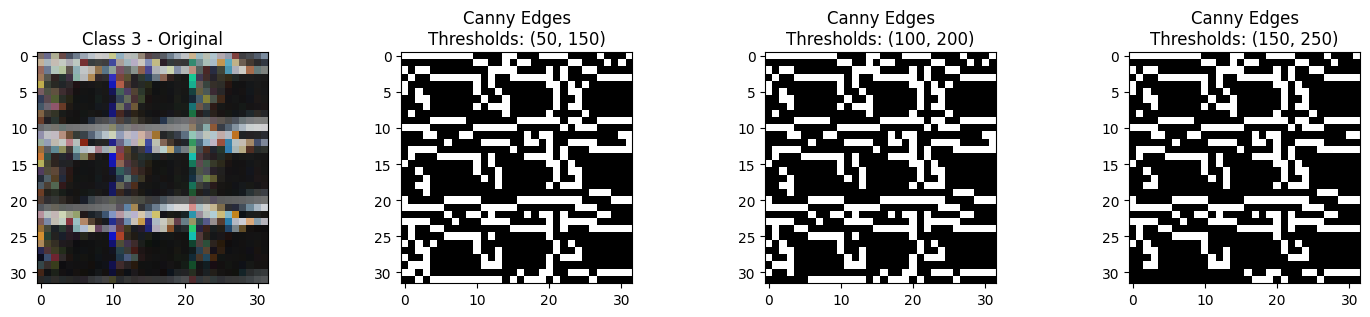

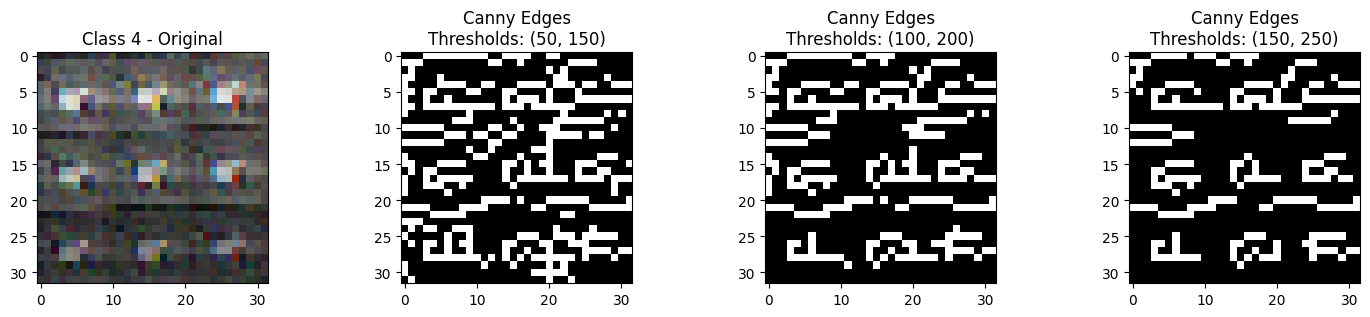

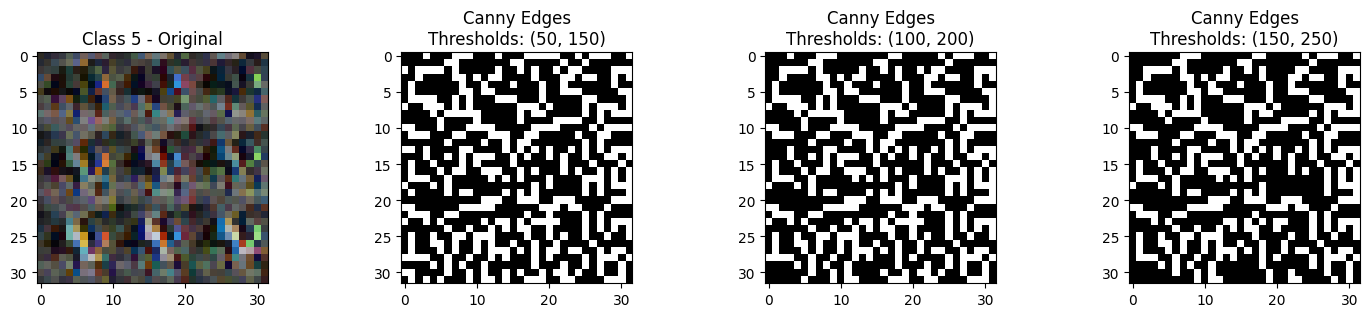

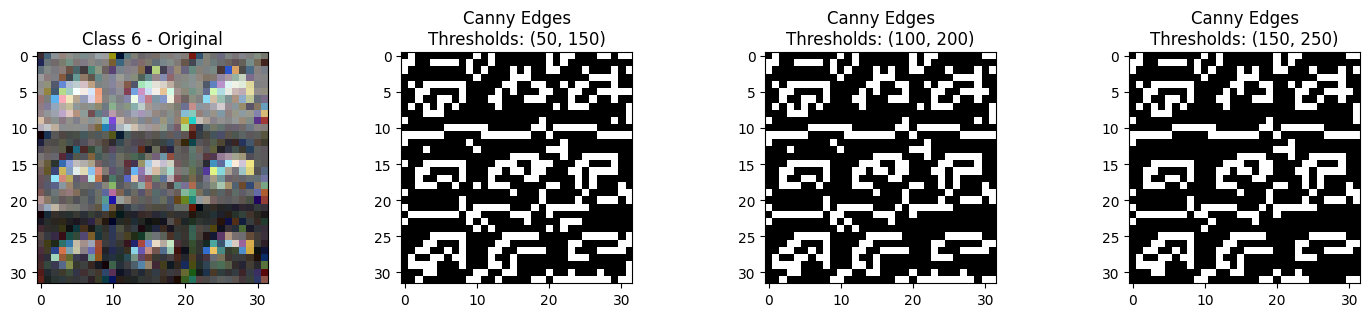

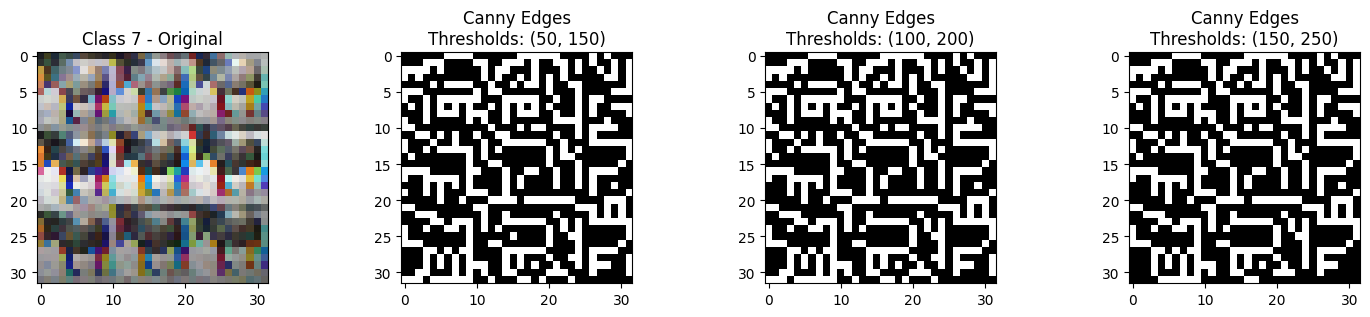

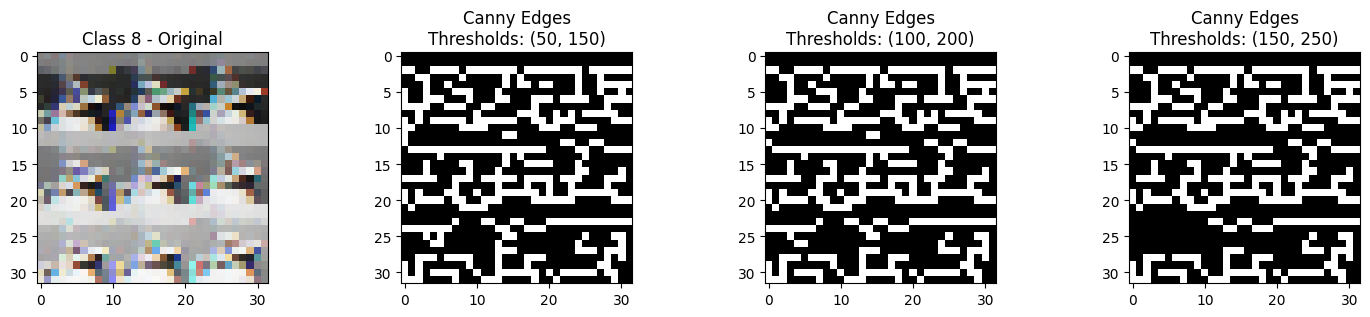

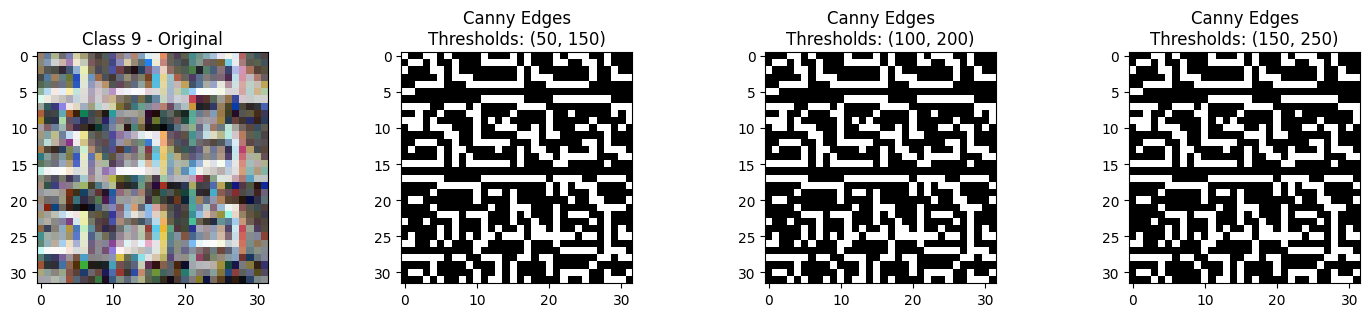

In [4]:
# Function to apply Canny edge detector and plot the images
def apply_canny_edge(images, labels, thresholds):
    # Iterating through each class
    for class_label in range(10):
        # Finding the index of the first image belonging to the current class
        index = labels.index(class_label)

        # Loading the image
        image = images[index].reshape((32, 32, 3))

        # Converting the image to grayscale (because canny edge works well only on one single channel and colored images have multiple channels)
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Ploting the original image
        plt.figure(figsize=(18, 3))
        plt.subplot(1, len(thresholds) + 1, 1)
        plt.imshow(image)
        plt.title(f'Class {class_label} - Original')

        # Applying Canny edge detector for different thresholds and plotting the image
        for i, threshold in enumerate(thresholds):
            edges = cv2.Canny(gray_image, threshold[0], threshold[1])
            plt.subplot(1, len(thresholds) + 1, i + 2)
            plt.imshow(edges, cmap='gray')
            plt.title(f'Canny Edges\nThresholds: {threshold}')

        plt.show()

# Defining threshold values for Canny edge detector
thresholds_canny = [(50, 150), (100, 200), (150, 250)]

# Calling the function to apply canny edge detector and plot the original & filtered images
apply_canny_edge(selected_images, selected_labels, thresholds_canny)

**Observation:** With an increased value in the Canny Edge Detector, the number of edges detected become less in number. It is selectively detecting those edge which might be the most prominent ones. Increasing the threshold value while using this filter can be good in scenarios when we only want to identify the most prominent edges only.

**Justification:** As seen in class 0, the number of edges detected with thresholds (150, 200) are less as compared to the number of edges detected with thresholds (50, 150)

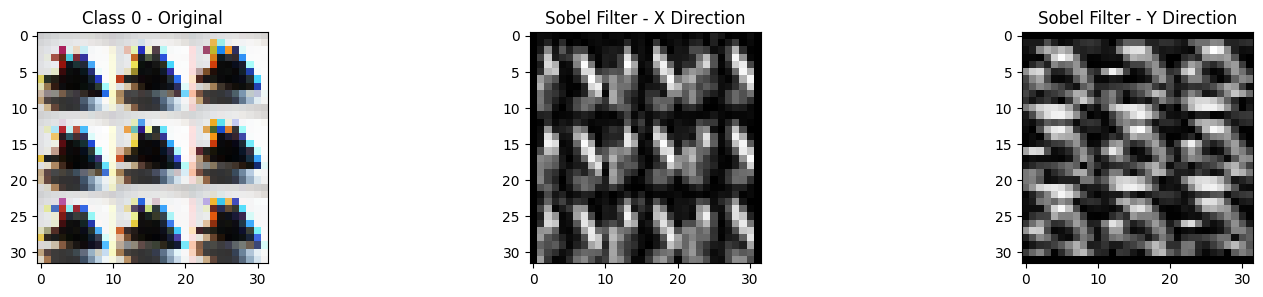

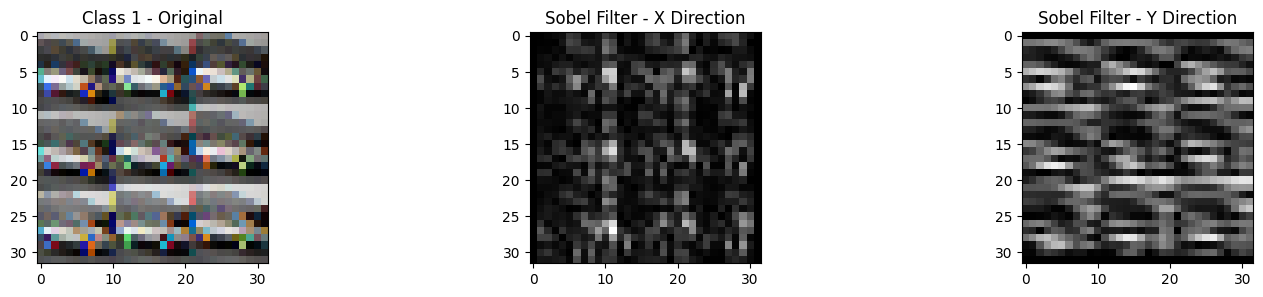

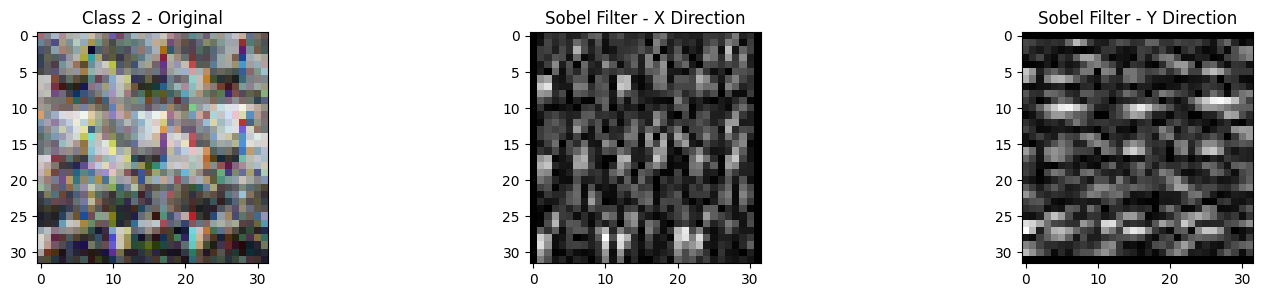

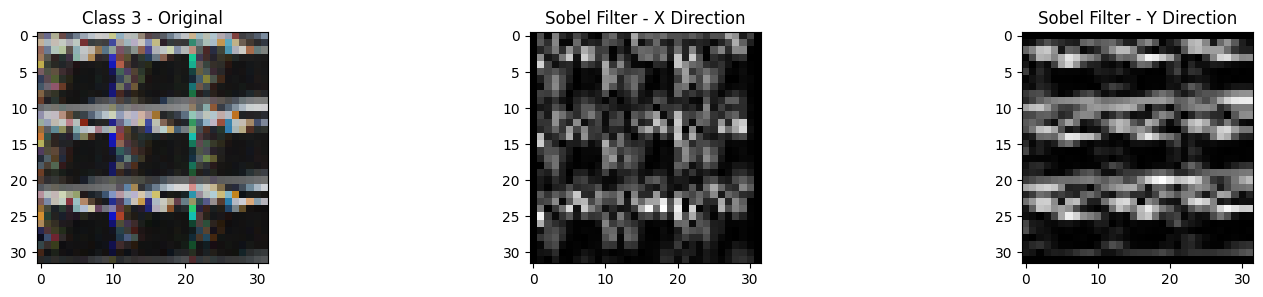

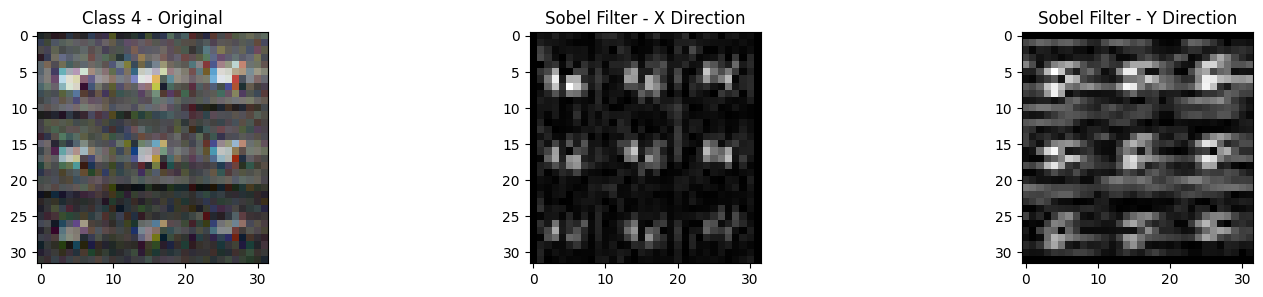

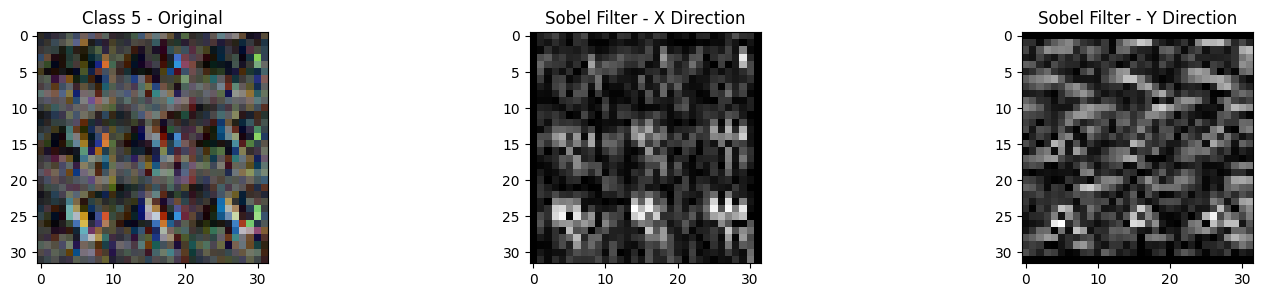

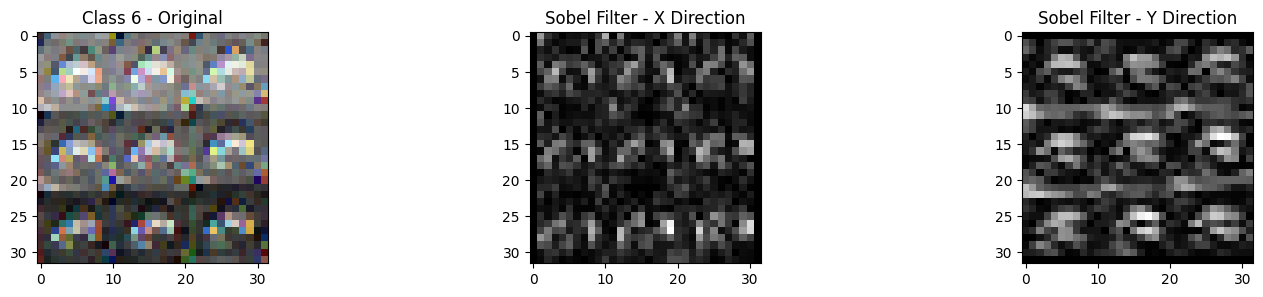

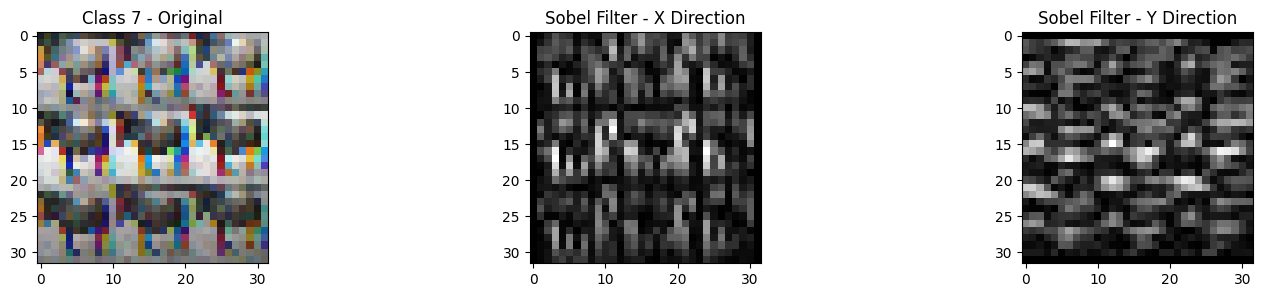

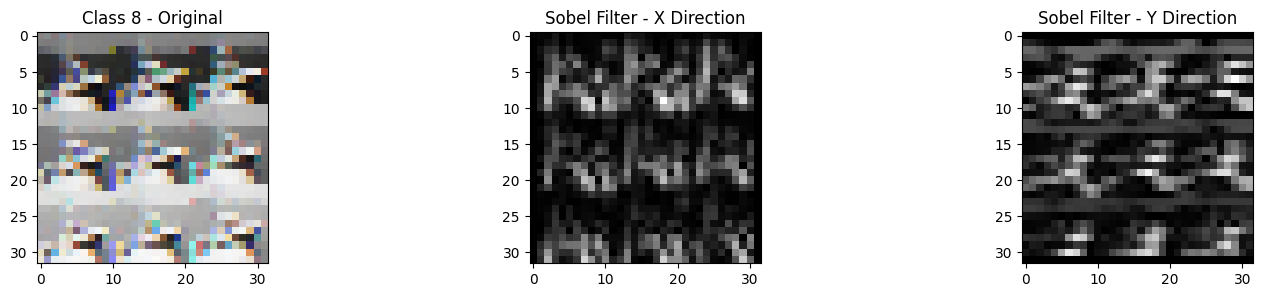

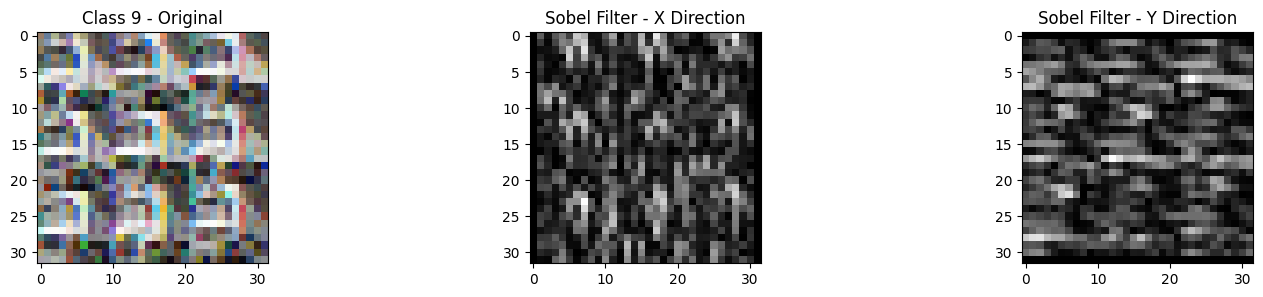

In [5]:
# Function to apply Sobel filter and plot the images
def apply_sobel_filter(images, labels):
    # Iterating through each class
    for class_label in range(10):
        # Finding the index of the first image belonging to the current class
        index = labels.index(class_label)

        # Loading the image
        image = images[index].reshape((32, 32, 3))

        # Converting the image to grayscale (because like canny edge, sobel filter works well only on one single channel and colored images have multiple channels)
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Plotting the original image
        plt.figure(figsize=(18, 3))
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title(f'Class {class_label} - Original')

        # Applying and plotting the Sobel filter in the x-direction
        sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
        abs_sobel_x = np.absolute(sobel_x)
        scaled_sobel_x = np.uint8(255 * abs_sobel_x / np.max(abs_sobel_x))
        plt.subplot(1, 3, 2)
        plt.imshow(scaled_sobel_x, cmap='gray')
        plt.title('Sobel Filter - X Direction')

        # Applying and plotting the Sobel filter in the y-direction
        sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
        abs_sobel_y = np.absolute(sobel_y)
        scaled_sobel_y = np.uint8(255 * abs_sobel_y / np.max(abs_sobel_y))
        plt.subplot(1, 3, 3)
        plt.imshow(scaled_sobel_y, cmap='gray')
        plt.title('Sobel Filter - Y Direction')

        plt.show()

# Calling the function to apply sobel filter and plot the original & filtered images
apply_sobel_filter(selected_images, selected_labels)

**Observation:** As compared to Canny Edge detector, Sobel filter doesn't give very clean edges. It is giving us edges separately in both x and y direction but it looks like it is not able to handle noise as effectively as canny edge detector.

**Justification:** As seen in class 9, sobel filter when compared with Canny edge is not able to give very defined edges. In fact the image is a bit blurred to be able to see the edges clearly.

**I would choose canny edge detector over sobel filter because of its ability to handle noise as well as for being able to give more clean and defined images.** I can also use a threshold in canny edge detector to extract only prominent edges as per my requirement.

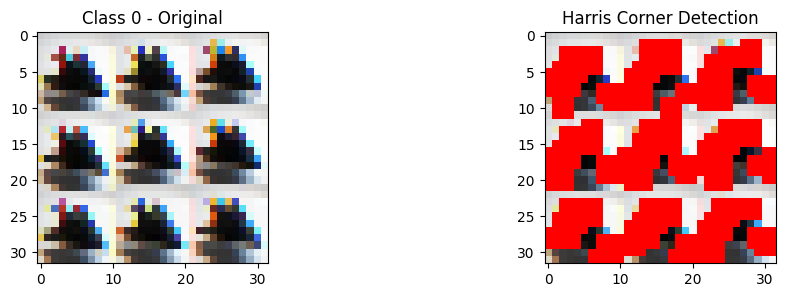

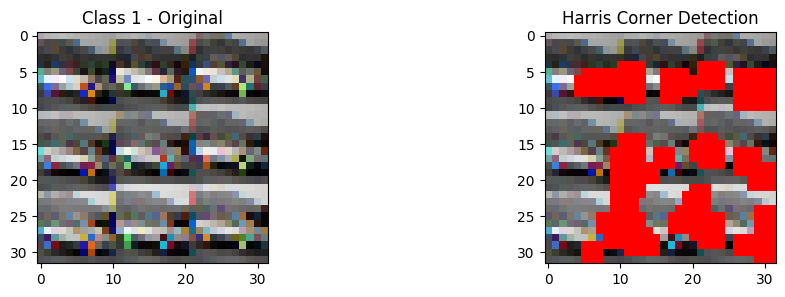

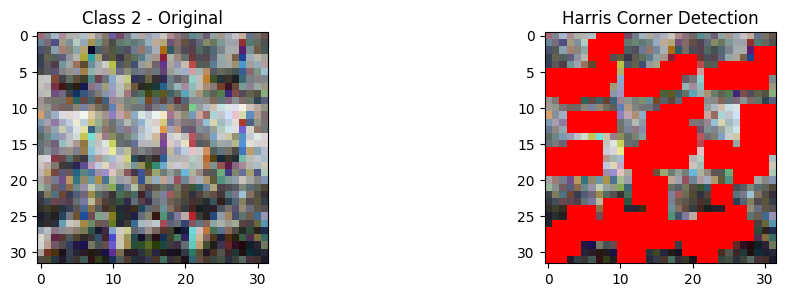

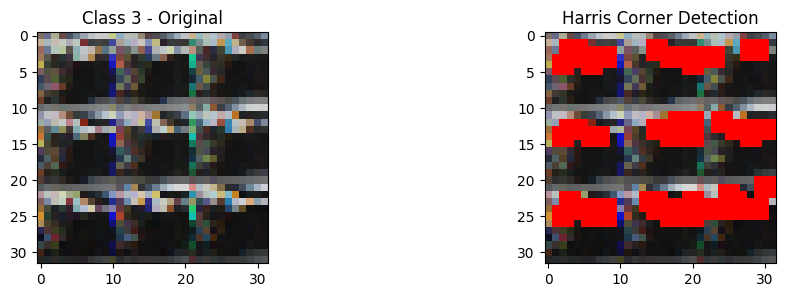

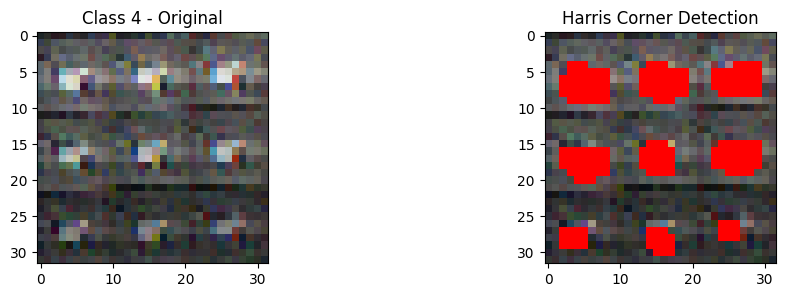

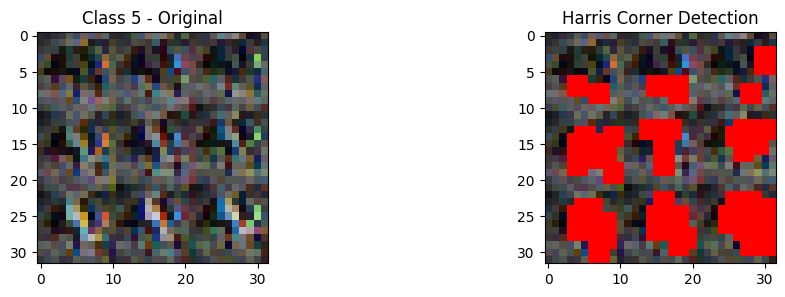

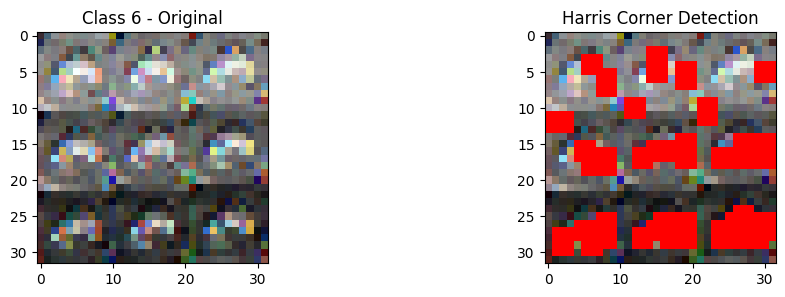

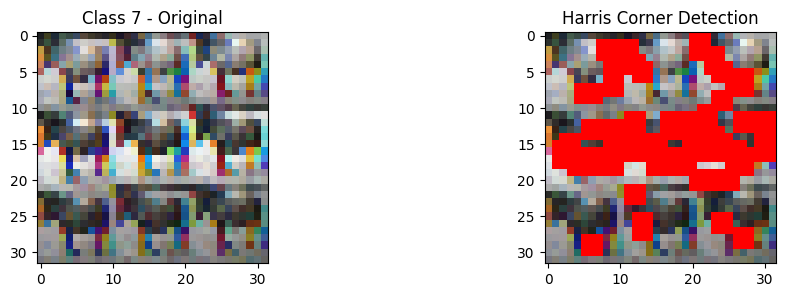

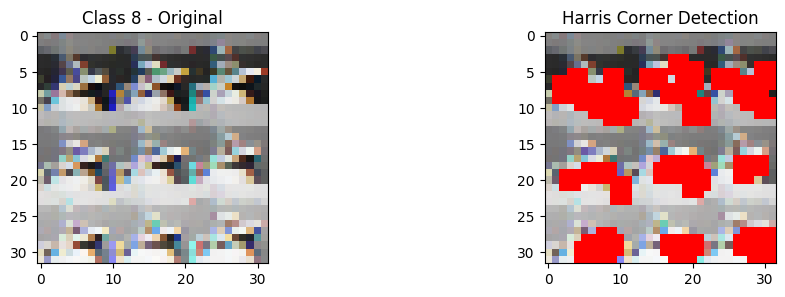

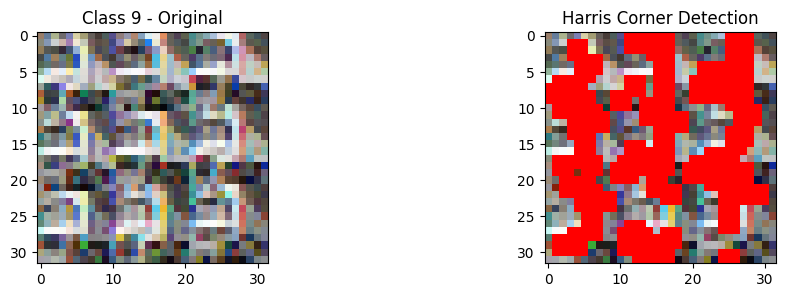

In [6]:
# Function to apply Harris Corner detector and plot the images
def apply_harris_corner(images, labels, harris_param):
    # Iterating through each class
    for class_label in range(10):
        # Finding the index of the first image belonging to the current class
        index = labels.index(class_label)

        # Loading the image
        image = images[index].reshape((32, 32, 3))

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Detecting corners using Harris Corner detector
        corners = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=harris_param)
        corners = cv2.dilate(corners, None)

        # Setting the threshold
        threshold = 0.1 * corners.max()

        # Creating an image copy to draw corners
        corner_image = image.copy()

        # Drawing corners on the image
        corner_image[corners > threshold] = [255, 0, 0]  # Red color for corners

        # Plotting the original image and corners
        plt.figure(figsize=(12, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title(f'Class {class_label} - Original')

        plt.subplot(1, 2, 2)
        plt.imshow(corner_image)
        plt.title('Harris Corner Detection')

        plt.show()

# Define Harris Corner parameter
harris_param = 0.04

# Calling the function to apply Harris Corner detector and plot the original & filtered images
apply_harris_corner(selected_images, selected_labels, harris_param)

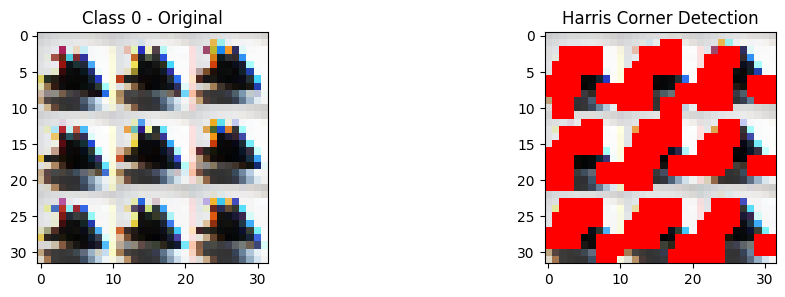

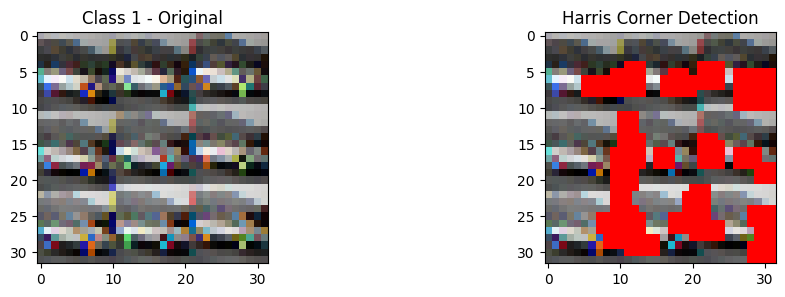

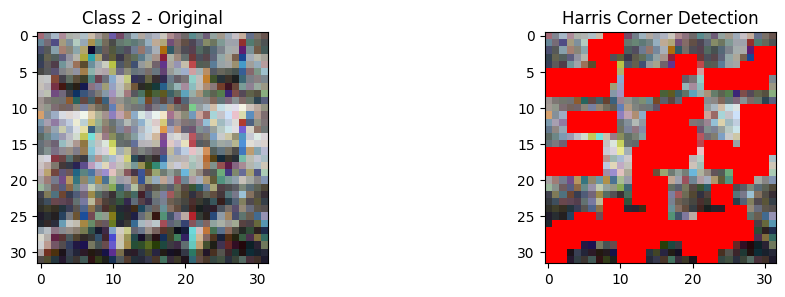

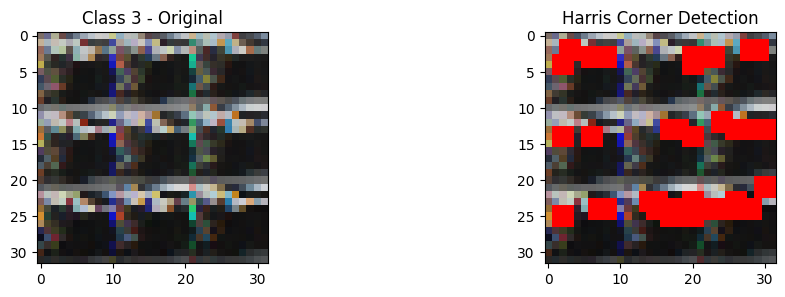

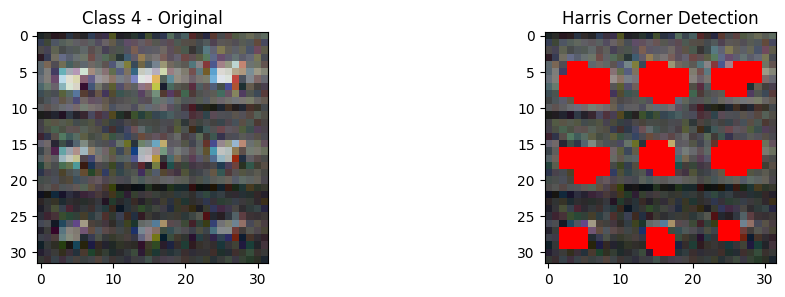

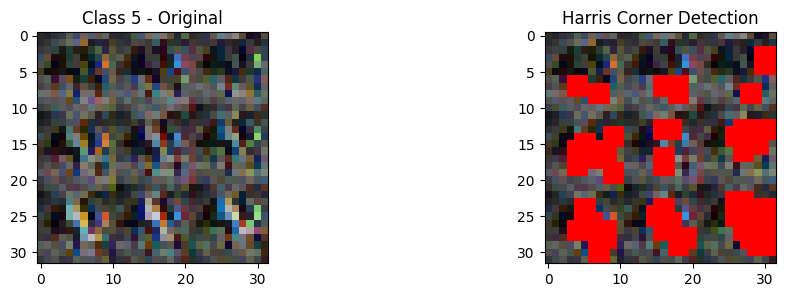

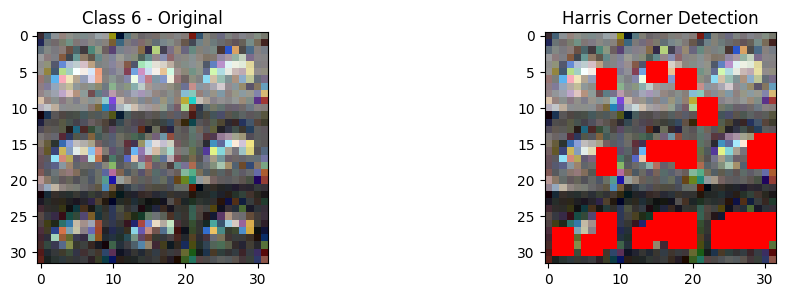

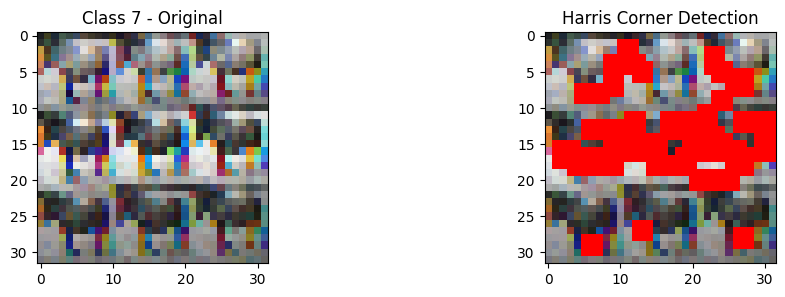

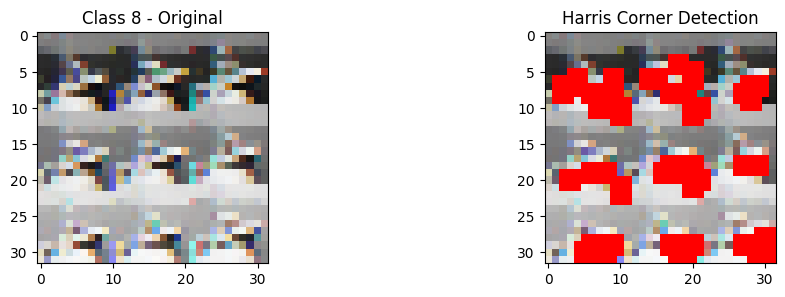

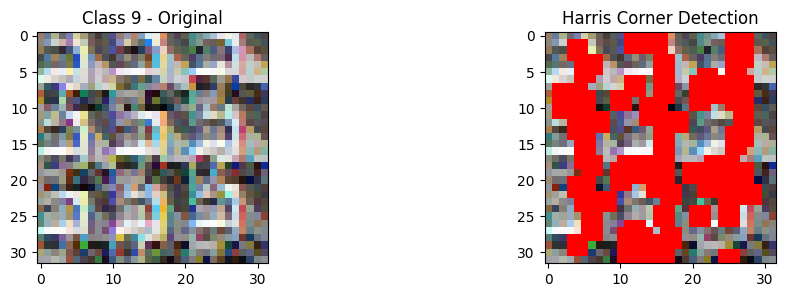

In [7]:
# Define Harris Corner with a different parameter
harris_param = 0.07

# Calling the function to apply Harris Corner detector and plot the original & filtered images
apply_harris_corner(selected_images, selected_labels, harris_param)

**Observation:** By increasing the parameter value, I could less number of corners detected by the Harris Corner detector. Only the prominent corners were detected by increasing the parameter value.

**Justification:** As seen in class 4, when the threshold value of Harris Corner detector is increased from 0.04 to 0.07, lesser number of corners have been indentified and displayed.

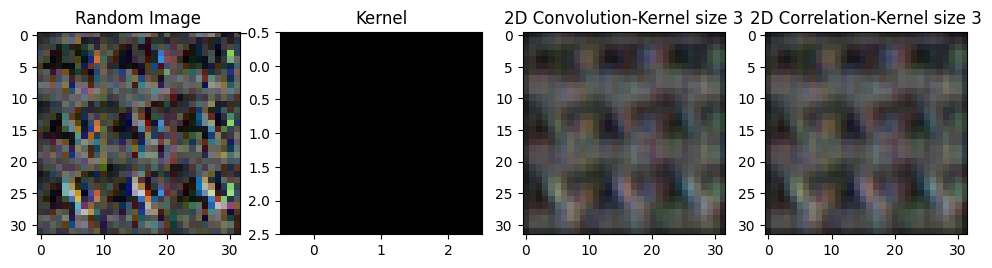

In [9]:
# Importing scipy library
from scipy import ndimage

# Function to apply 2D convolution
def convolution_2d(image, kernel):
    return ndimage.convolve(image, kernel[:, :, None], mode='constant', cval=0.0)

# Function to apply 2D correlation
def correlation_2d(image, kernel):
    return ndimage.correlate(image, kernel[:, :, None], mode='constant', cval=0.0)

# Choosing a sample image from the above selected 10 images
random_index = np.random.randint(0, len(selected_images))
image = selected_images[random_index]

# Choosing a sample 3x3 box filter for our problem
kernel = np.ones((3, 3)) / 9.0
kernel_size = 3

# Performing 2D convolution
convolution_result = convolution_2d(image.reshape((32, 32, 3)), kernel)

# Performing 2D correlation
correlation_result = correlation_2d(image.reshape((32, 32, 3)), kernel)

# Plotting the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image.reshape((32, 32, 3)))
plt.title('Random Image')

plt.subplot(1, 4, 2)
plt.imshow(kernel, cmap='gray')
plt.title('Kernel')

plt.subplot(1, 4, 3)
plt.imshow(convolution_result, cmap='gray')
plt.title(f'2D Convolution-Kernel size {kernel_size}')

plt.subplot(1, 4, 4)
plt.imshow(correlation_result, cmap='gray')
plt.title(f'2D Correlation-Kernel size {kernel_size}')

plt.show()

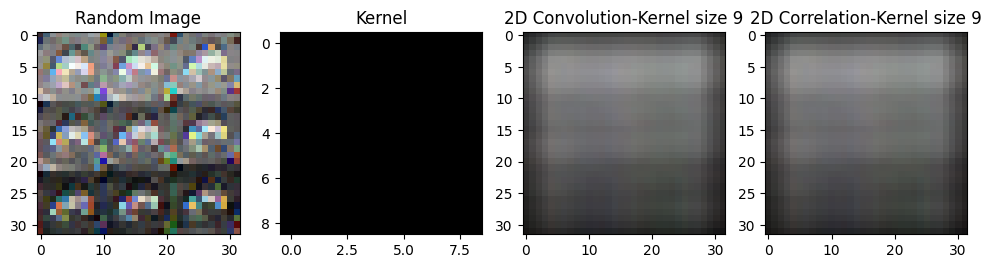

In [11]:
# Importing scipy library
from scipy import ndimage

# Function to apply 2D convolution
def convolution_2d(image, kernel):
    return ndimage.convolve(image, kernel[:, :, None], mode='constant', cval=0.0)

# Function to apply 2D correlation
def correlation_2d(image, kernel):
    return ndimage.correlate(image, kernel[:, :, None], mode='constant', cval=0.0)

# Choosing a sample image from the above selected 10 images
random_index = np.random.randint(0, len(selected_images))
image = selected_images[random_index]

# Choosing a sample 5x5 box filter for our problem
kernel = np.ones((9, 9)) / 81.0
kernel_size = 9

# Performing 2D convolution
convolution_result = convolution_2d(image.reshape((32, 32, 3)), kernel)

# Performing 2D correlation
correlation_result = correlation_2d(image.reshape((32, 32, 3)), kernel)

# Plotting the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image.reshape((32, 32, 3)))
plt.title('Random Image')

plt.subplot(1, 4, 2)
plt.imshow(kernel, cmap='gray')
plt.title('Kernel')

plt.subplot(1, 4, 3)
plt.imshow(convolution_result, cmap='gray')
plt.title(f'2D Convolution-Kernel size {kernel_size}')

plt.subplot(1, 4, 4)
plt.imshow(correlation_result, cmap='gray')
plt.title(f'2D Correlation-Kernel size {kernel_size}')

plt.show()

Correlation tells us how two things are related to each other while convolution combines two things and gives us the output. While there is not a lot of prominent difference in both, if we look closely, convolution gives us a mirrored effect of the image and correlation is maintaining the original representation of the image. This is because with convolution we flip the kernel by 180 before applying it on the image.